In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
plt.ioff()
# turn of warnings
import warnings
warnings.filterwarnings('ignore')


# Different scales

Besides the length-scale, there are many other ways of characterizing a certain
scale of a covariance model. We provide two common scales with the covariance
model.

## Integral scale

The [integral scale](https://en.wikipedia.org/wiki/Integral_length_scale) of a covariance model is calculated by:

$I = \int_0^\infty \rho(r) dr$

You can access it by:


In [2]:
import gstools as gs

model = gs.Stable(dim=3, var=2.0, len_scale=10)
print("Main integral scale:", model.integral_scale)
print("All integral scales:", model.integral_scale_vec)

Main integral scale: 9.027452929509336
All integral scales: [9.02745293 9.02745293 9.02745293]


You can also specify integral length scales like the ordinary length scale,
and len_scale/anis will be recalculated:



In [3]:
model = gs.Stable(dim=3, var=2.0, integral_scale=[10, 4, 2])
print("Anisotropy ratios:", model.anis)
print("Main length scale:", model.len_scale)
print("All length scales:", model.len_scale_vec)
print("Main integral scale:", model.integral_scale)
print("All integral scales:", model.integral_scale_vec)

Anisotropy ratios: [0.4 0.2]
Main length scale: 11.077321674324725
All length scales: [11.07732167  4.43092867  2.21546433]
Main integral scale: 10.0
All integral scales: [10.  4.  2.]


## Percentile scale

Another scale characterizing the covariance model, is the percentile scale.
It is the distance, where the normalized
variogram reaches a certain percentage of its sill.



In [4]:
model = gs.Stable(dim=3, var=2.0, len_scale=10)
per_scale = model.percentile_scale(0.9)
int_scale = model.integral_scale
len_scale = model.len_scale
print("90% Percentile scale:", per_scale)
print("Integral scale:", int_scale)
print("Length scale:", len_scale)

90% Percentile scale: 17.437215135964117
Integral scale: 9.027452929509336
Length scale: 10.0


## Note
The nugget is neglected by the percentile scale.

## Comparison

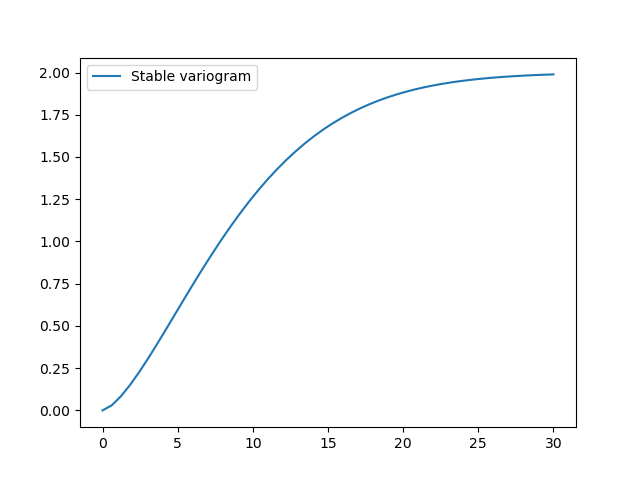

In [5]:
ax = model.plot()
ax.axhline(1.8, color="k", label=r"90% percentile")
ax.axvline(per_scale, color="k", linestyle="--", label=r"90% percentile scale")
ax.axvline(int_scale, color="k", linestyle="-.", label=r"integral scale")
ax.axvline(len_scale, color="k", linestyle=":", label=r"length scale")
ax.legend()